# Task 1

In [1]:
path = "../../original_files/exercises/Sheet 3/data/dat.csv"

with open(path,'r') as f:
    print(f.read())


"","x1","x2"
"1",1.1,6.5
"2",2.1,6.5
"3",2.1,5.5
"4",1.1,4.5
"5",2.1,3.5
"6",-0.9,-2.5
"7",-1.9,-4.5
"8",-0.9,-5.5
"9",-2.9,-6.5
"10",-1.9,-7.5



In [23]:
import numpy as np

data = np.loadtxt(path, delimiter=',', skiprows=1, usecols=(1,2))

def PCA (data):
    centered_data = data - np.mean(data, axis=0)
    cov = 1/(data.shape[1]-1) * centered_data.T @ centered_data
    scores, loadings = np.linalg.eigh(cov)
    scores = scores**0.5
    print(loadings)
    loadings = loadings*np.vstack((scores,scores)).T
    print(loadings)
    return scores, loadings

scores, loadings = PCA(data)


[[-0.95438125  0.29859073]
 [ 0.29859073  0.95438125]]
[[-1.82266708  0.57024537]
 [ 5.43855539 17.38317636]]


In [15]:
# The scores are the eigenvalues of the covariance matrix
scores


array([ 1.90978927, 18.21407985])

In [13]:
# The loadings are the eigenvectors of the covariance matrix
loadings


array([[-1.82266708,  5.43855539],
       [ 0.57024537, 17.38317636]])

In [5]:
# explained_variance: The ratio which each eigenvalue takes up of the whole
explained_variance = scores/np.sum(scores).squeeze()
explained_variance


array([0.09490169, 0.90509831])

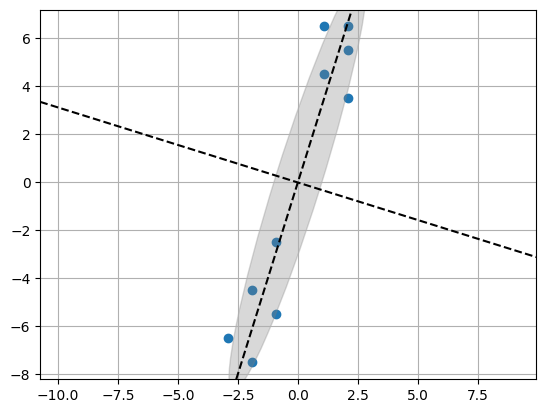

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(1,1)
ax.scatter(data.T[0], data.T[1])
ax.axline(xy1=(0,0), xy2=loadings[0], color = 'black', linestyle = 'dashed')
ax.axline(xy1=(0,0), xy2=loadings[1], color = 'black', linestyle = 'dashed')
# Plot an ellipse to represent the importance of each axis, the width and height are the standard deviation of each axis
ellipse = Ellipse((0,0), scores[0]**0.5, scores[1]**0.5, angle= -180/np.pi*np.arccos(loadings[1]@[0,1]), color = 'grey', alpha = 0.3)
ax.add_artist(ellipse)

ax.grid()
ax.axis('equal')
plt.show()


# Task 2 Multi-dimensional scaling

Implement a PCoA (Classical multidimensional scaling, principal coordinates analysis) in two dimensions.
Use the packages Scikit-Learn, Numpy, Matplotlib and the dataset eurodist.csv. Plot the results.

In [7]:
from sklearn.manifold import MDS
path = "../../original_files/exercises/Sheet 3/data/eurodist.csv"

data = np.genfromtxt(path, delimiter=',')
data = np.delete(data, 0, axis = 0)
data = np.delete(data, 0, axis = 1)


pcoa = MDS(dissimilarity="precomputed", max_iter = 300, eps=1e-6, normalized_stress='auto')
pcoa.fit(data)
coordinates = pcoa.fit_transform(data)


In [8]:
pcoa.stress_


3356497.366009377

In [9]:
cities = np.loadtxt(path, dtype=str, delimiter=",", usecols=(0), skiprows= 1)
# help(np.loadtxt)
cities = np.char.strip(cities, '"')
cities


array(['Athens', 'Barcelona', 'Brussels', 'Calais', 'Cherbourg',
       'Cologne', 'Copenhagen', 'Geneva', 'Gibraltar', 'Hamburg',
       'Hook of Holland', 'Lisbon', 'Lyons', 'Madrid', 'Marseilles',
       'Milan', 'Munich', 'Paris', 'Rome', 'Stockholm', 'Vienna'],
      dtype='<U17')

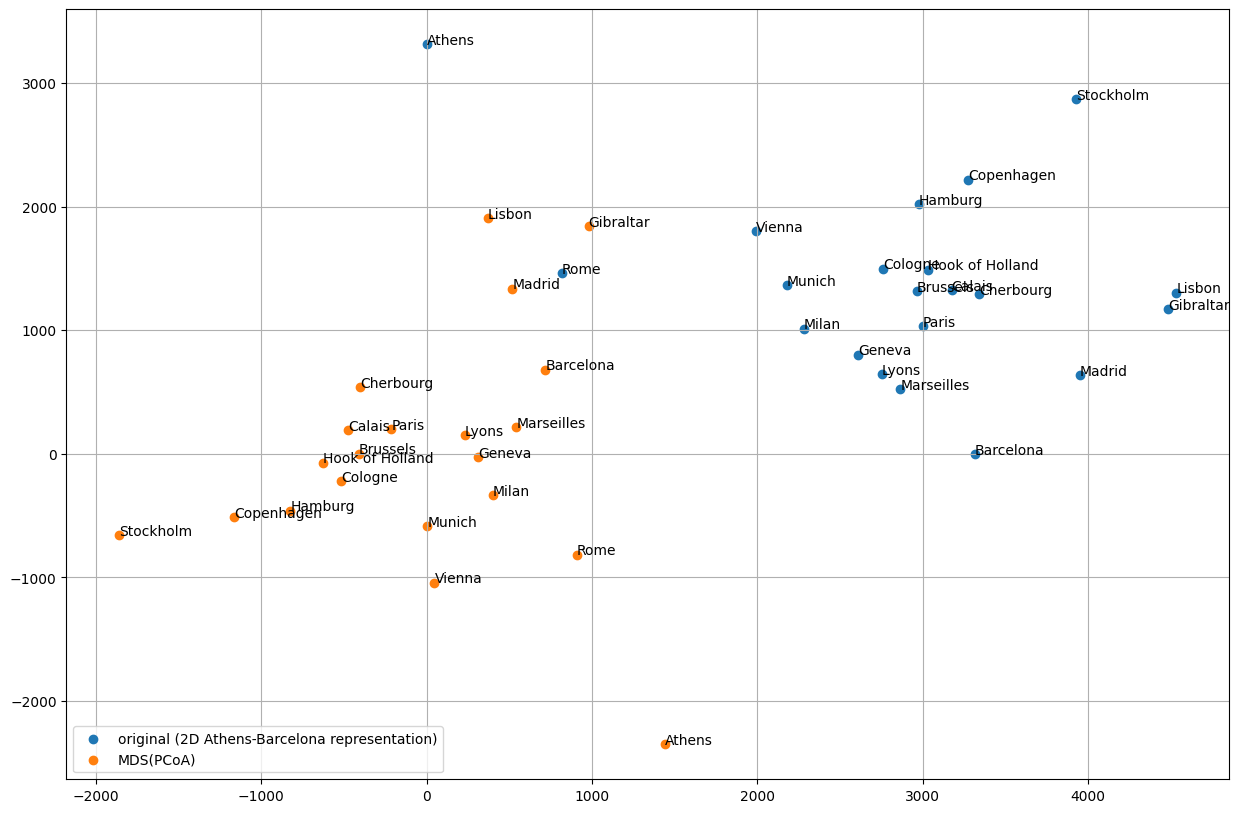

In [10]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.scatter(data[:, 0], data[:,1], label = "original (2D Athens-Barcelona representation)")
ax.scatter(coordinates[:, 0], coordinates[:, 1], label = "MDS(PCoA)")

for i, text in enumerate(cities):
    ax.annotate(text, (data[i,0], data[i,1]))
    ax.annotate(text, (coordinates[i,0], coordinates[i,1]))

ax.legend(loc = "lower left")
ax.grid()
plt.show()


Bonus: Is the implementation of MDS in Scikit-Learn a classic MDS (PCoA)? (With justification)

Yes. If the option "metric" is set as True.

- The metric MDS takes a distance matrix as an input.
- As shown above, the metric MDS maps the distance matrix to a 2-dimentional map.
- Most importantly, the metric MDS preserves the distance between pair of features **as much as possible**:

In [11]:
for i in range(len(cities)):
    for j in range(i+1):
        print('Distance between {} and {}: '.format(cities[i], cities[j]))
        print('    Original: {}'.format(data[i,j]))
        print('    Euclidean after MDS: {}'.format(((coordinates[i,0] - coordinates[j,0])**2 + (coordinates[i,1] - coordinates[j,1])**2)**0.5))


Distance between Athens and Athens: 
    Original: 0.0
    Euclidean after MDS: 0.0
Distance between Barcelona and Athens: 
    Original: 3313.0
    Euclidean after MDS: 3115.682643534531
Distance between Barcelona and Barcelona: 
    Original: 0.0
    Euclidean after MDS: 0.0
Distance between Brussels and Athens: 
    Original: 2963.0
    Euclidean after MDS: 2993.8104491916756
Distance between Brussels and Barcelona: 
    Original: 1318.0
    Euclidean after MDS: 1316.6054775836717
Distance between Brussels and Brussels: 
    Original: 0.0
    Euclidean after MDS: 0.0
Distance between Calais and Athens: 
    Original: 3175.0
    Euclidean after MDS: 3180.704866478495
Distance between Calais and Barcelona: 
    Original: 1326.0
    Euclidean after MDS: 1288.5460623532524
Distance between Calais and Brussels: 
    Original: 204.0
    Euclidean after MDS: 197.71395460071898
Distance between Calais and Calais: 
    Original: 0.0
    Euclidean after MDS: 0.0
Distance between Cherbourg and

# Task 3

a) Are there conditions under which the results of a PCA and a PCoA are equivalent? If so, what are
they?

If the pairwise distance between features are defined as Euclidean distance, the results of a PCA and a PCoA are equivalent.


b) What options exist to determine a meaningful number of dimensions for a PCoA? 

1. We consider first low dimentional (1D, 2D or 3D) space for better visualization and understanding

*"The minimal dimensionality for a perfect MDS representation is only of
formal interest. In practice, we always try to represent the data in an MDS
space of considerably lower dimensionality. The rationale for choosing a low
dimensionality is the expectation that this will cancel out over- and under- estimation errors in the proximities, thus smoothing the representation (see
Chapter 3). Moreover, a low-dimensional and preferably two-dimensional
solution is often precise enough for a first interpretation. For the data in
Table 4.1, we first try solutions in 1D, 2D, and 3D space (using the MDS
module of Systat 5.0)."*

-- *Modern Multidimensional Scaling Theory and Application*

2. We may choose a dimensionality with both a low stress value and low dimension


In [12]:
for i in range(1,10):
    pcoa = MDS(n_components=i, n_init= 50, dissimilarity="precomputed", max_iter = 5000, eps=1e-6, normalized_stress='auto')
    pcoa.fit(data)
    print("{}D: ".format(i),pcoa.stress_)


1D:  48721057.57142857


2D:  3356497.3660035618
3D:  2856447.1694908887
4D:  2755128.4853614043
5D:  2724579.6120780907
6D:  2721877.837305396
7D:  2721878.2053869623
8D:  2721885.872596871
9D:  2721889.6167773707


In our case, the 2D or 3D representation might be good for distance representation.

3. Shepard diagram

The shepard diagram shows the correlation between the pairwise input dissimilarities and the predicted distances. A clear positive correlation with a low dimension indicates a reasonable number of dimentions.

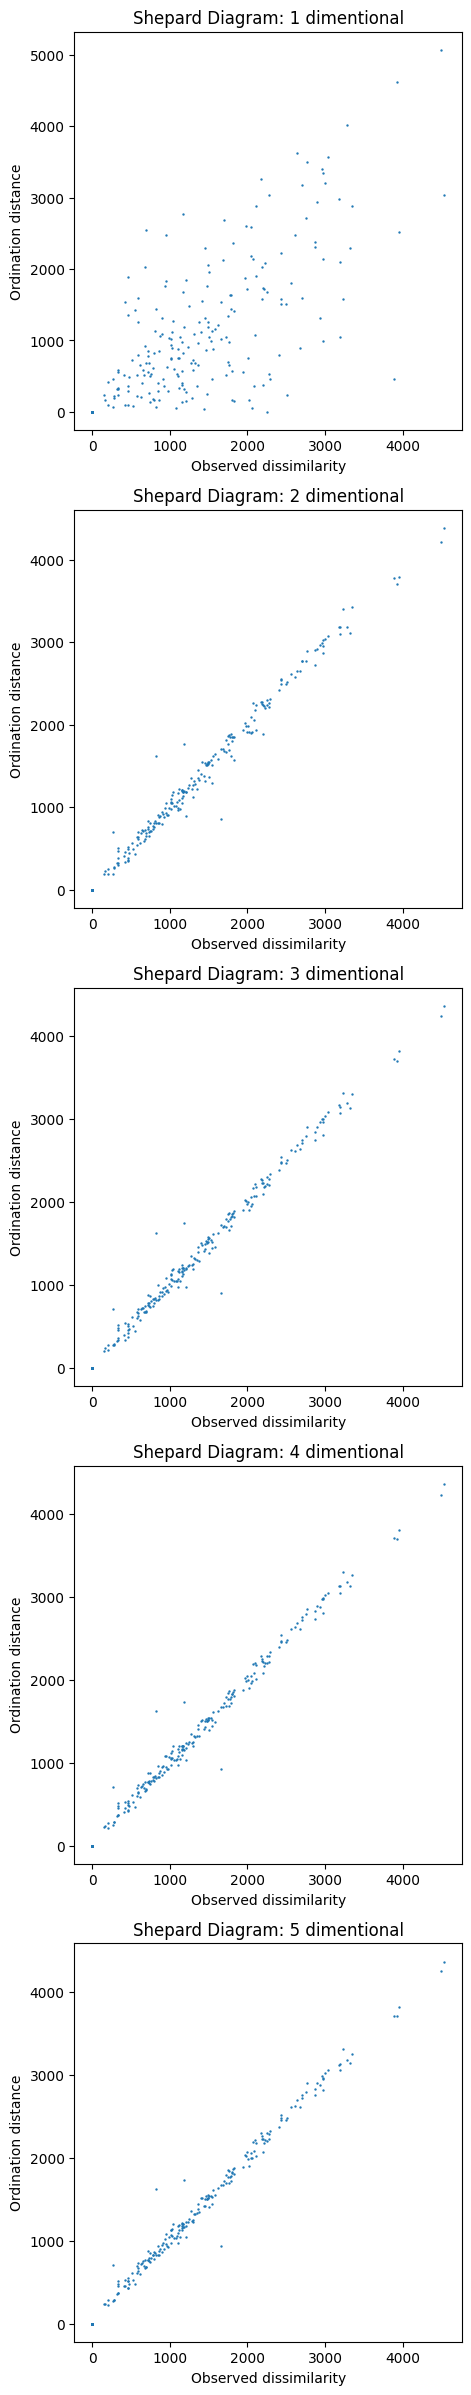

In [13]:
fig, ax = plt.subplots(5,1,figsize = (5,30))

for k in range(0, 5):
    pcoa = MDS(n_components=k+1, n_init= 1, dissimilarity="precomputed", max_iter = 5000, eps=1e-6, normalized_stress='auto')
    pcoa.fit(data)
    coordinates = pcoa.fit_transform(data)
    input_distance = []; output_distance = []
    for i in range(len(cities)):
        for j in range(i+1):
            input_distance.append(data[i,j])
            output_distance.append(np.dot(coordinates[i] - coordinates[j], coordinates[i] - coordinates[j])**0.5)

    ind = np.argsort(input_distance)
    input_distance = np.array(input_distance)[ind]
    output_distance = np.array(output_distance)[ind]
    ax[k].scatter(input_distance, output_distance, s=0.5)
    ax[k].set_xlabel('Observed dissimilarity')
    ax[k].set_ylabel('Ordination distance')
    ax[k].set_title('Shepard Diagram: {} dimentional'.format(k+1))
plt.show()


As the example shows, at dimention = 2, there is already a clear positive correlation.